In [ ]:
# 시도별 전출입 인구수 데이터 불러오기 pd.read_excel(파일)
# 전출지별에 누락데이터 처리
# 전출지가 '서울특별시'에서 다른 도시로 전입한 인구수만 추출
# 같은 데이터만 보유하고 있는 전출지별 컬럼을 삭제
# 전입지별 컬럼명을 전입지로 변경
# 전입지를 인덱스로 설정
# 전입지가 경기도인 자료만 추출
# 년도별 전입자 인구수의 변화를 확인
# 그래프 -> 시각화해서 한 눈으로 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')

df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
df = df.fillna(method = 'ffill')   # 원 데이터 보존

In [4]:
# 전출지별이 서울특별시인 자료만 검색

mask = ((df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시'))

df_seoul = df[mask]

df_seoul.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891


In [5]:
# 전출지별 컬럼을 삭제

df_seoul = df_seoul.drop('전출지별', axis = 1)

In [6]:
df_seoul.head()

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [7]:
# 전입지별의 컬럼명을 전입지로 수정, 전입지를 인덱스로 설정

df_seoul.rename(columns = {'전입지별' : '전입지'}, inplace = True)
df_seoul.set_index('전입지', inplace = True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [10]:
# 전입지가 경기도인 자료를 추출

df_one = df_seoul.loc['경기도']
print(df_one.head())

print(df.index)
print(df_one.values)

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object
RangeIndex(start=0, stop=325, step=1)
[130149 150313 93333 143234 149045 253705 202276 207722 237684 278411
 297539 252073 320174 400875 352238 390265 412535 405220 415174 412933
 473889 384714 428344 502584 542204 599411 520566 495454 407050 471841
 435573 499575 516765 457656 400206 414621 449632 431637 412408 398282
 410735 373771 354135 340801 332785 359337 370760 342433]


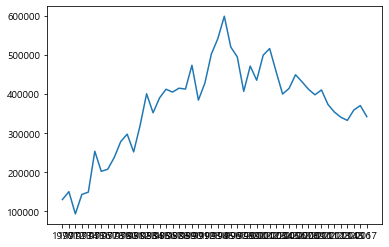

In [35]:
plt.plot(df_one)

In [20]:
# %load 한글.py                -> %load 한글(내가 만든 파일).py 에서 엔터를 누르면 
#!/usr/bin/env python            내가 작성한 내용을 불러와 다시 엔터를 누르면 활성화가 된다.

# In[ ]:


import matplotlib.pyplot as plt                     # 한글 폰트를 설정하는 명령어

from matplotlib import rc

rc('font', family = 'Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False



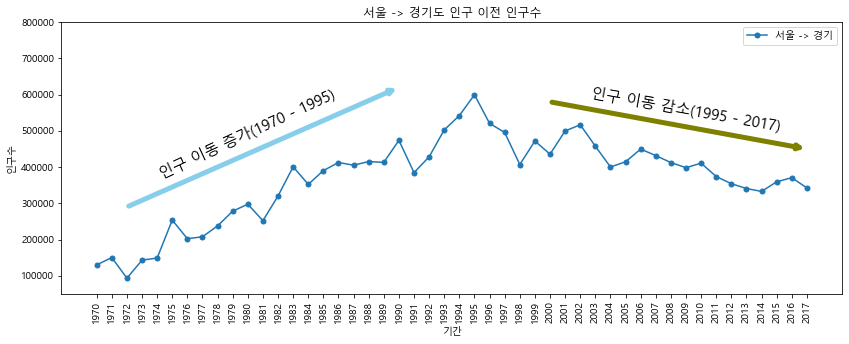

In [42]:
plt.figure(figsize = (14, 5))

# plt.plot(df_one)  -> 마커 없이 그래프 설정
plt.plot(df_one, marker = 'o', markersize = '5')         # 인덱스 x축, y축, 인구수
                                                            # marker는 x와 y가 만나는 곳에 점을 찍음

plt.title('서울 -> 경기도 인구 이전 인구수')       # 제목 설정
plt.xlabel('기간')                                 # x축 라벨
plt.ylabel('인구수')                               # y축 라벨

plt.legend(labels = ['서울 -> 경기'], loc = 'best')     # 그래프 안에 그래프에 대한 설명 첨가
                                                        # best는 적당한 위치에 넣는거
                                                        # center는 중앙에 넣음

plt.xticks(size = 10, rotation = 'vertical')            # xtick(그래프 아래 x축 정보)를 수정
# plt.xticks(size = 10, rotation = 90)          이런 식(각도)으로 작성해도 된다.  


plt.ylim(50000, 800000)

# 화살표 정의
plt.annotate('', xy = (20, 620000), xytext = (2, 290000), xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5))

plt.annotate('', xy = (47, 450000), xytext = (30, 580000), xycoords = 'data',
            arrowprops = dict(arrowstyle = '->', color = 'olive', lw = 5))

# 주석 표시
plt.annotate('인구 이동 증가(1970 - 1995)', xy = (10, 370000), rotation = 25,
            va = 'baseline', ha = 'center', fontsize = 15)

plt.annotate('인구 이동 감소(1995 - 2017)', xy = (39, 500000), rotation = -10,
            va = 'baseline', ha = 'center', fontsize = 15)



plt.show()      

# 그래프에 관련된 설정은 무조건 같은 셀에 작성해야한다.
# 그렇지 않으면 새로운 그래프가 작성됨

In [1]:
# 한 페이지에 두 개의 그래프를 그림, 두 개의 행으로

fig = plt.figure(figsize = (10 , 10))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

        color = 'skyblue', linewidth = 2, label = '서울 -> 경기')
# ax2.legend(loc = 'best')

# y축 범위 설정(최소값, 최대값)

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# x축 눈금 라벨 지정 75도 회전
ax1.set_xticklabels(df_one.index, rotation = 75)
ax2.set_xticklabels(df_one.index, rotation = 45)

plt.show()

NameError: name 'plt' is not defined

In [58]:
# 하나의 캔버스에 여러 개의 그래프를 그림

# 서울특별시에서 충청남도, 경상북도, 강원도로 이전한 인구수의 분포도

df_two = df_seoul.loc[['충청남도', '경상북도', '강원도'], :]
df_two.columns

col_years = list(map(str, range(1970, 2018))) # map 으로 인해 str이 모든 리스트 하나하나에 적용된다.
col_years                                           # 컬럼명을 리스트로 저장

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/4037684019.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 'vertical')


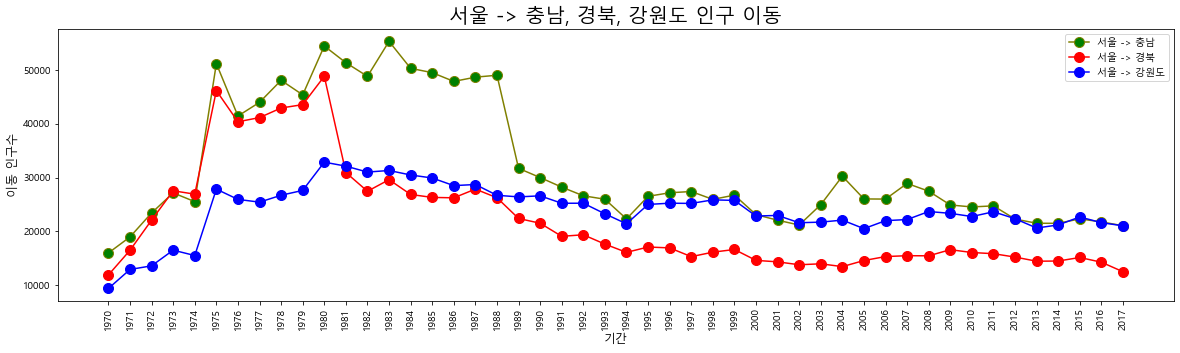

In [60]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(1, 1, 1)             # 이렇게 그래프를 하나 만들고

# ax에 그래프를 추가
# 단일 그래프라면 ax.plot(df_two, maker = ....) 이런 식으로 들어가는데
# 하나의 그래프에 여러 내용을 추가하기 위해서는 ax.plot(범위, 넣고 싶은 내용, marker=...) 이렇게 함

ax.plot(col_years, df_two.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', label = '서울 -> 충남')

ax.plot(col_years, df_two.loc['경상북도', :], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'red', label = '서울 -> 경북')

ax.plot(col_years, df_two.loc['강원도', col_years], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'blue', label = '서울 -> 강원도')

ax.legend(loc = 'best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원도 인구 이동', size = 20)

# 축 이름 추가
ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation = 'vertical')

plt.show()

In [61]:
# df_two에 전라남도 데이터를 추가

df_two.loc['전라남도'] = df_seoul.loc['전라남도', col_years]
df_two.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/2525417840.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/2525417840.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/2525417840.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/2525417840.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 'vertical')


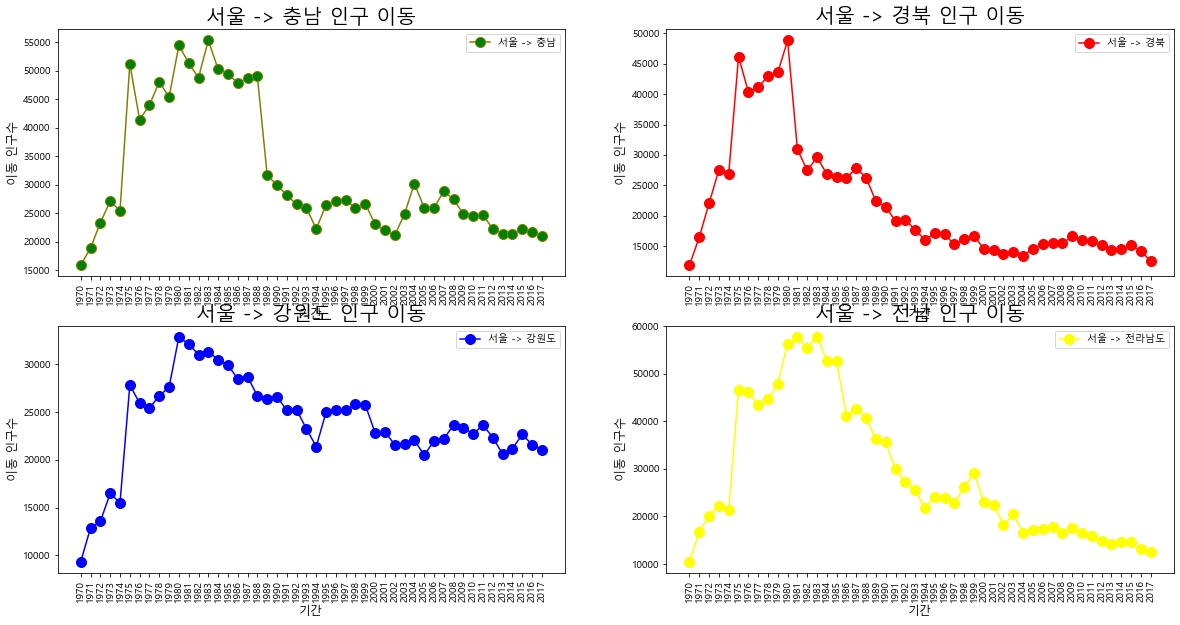

In [65]:
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2, 2, 1)             # 이렇게 그래프를 하나 만들고
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# ax에 그래프를 추가
ax1.plot(col_years, df_two.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', label = '서울 -> 충남')

ax2.plot(col_years, df_two.loc['경상북도', :], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'red', label = '서울 -> 경북')

ax3.plot(col_years, df_two.loc['강원도', col_years], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'blue', label = '서울 -> 강원도')

ax4.plot(col_years, df_two.loc['전라남도', col_years], marker = 'o', markerfacecolor = 'yellow',
       markersize = 10, color = 'yellow', label = '서울 -> 전라남도')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 20)
ax2.set_title('서울 -> 경북 인구 이동', size = 20)
ax3.set_title('서울 -> 강원도 인구 이동', size = 20)
ax4.set_title('서울 -> 전남 인구 이동', size = 20)

# 축 이름 추가
ax1.set_xlabel('기간', size = 12)
ax1.set_ylabel('이동 인구수', size = 12)

ax2.set_xlabel('기간', size = 12)
ax2.set_ylabel('이동 인구수', size = 12)

ax3.set_xlabel('기간', size = 12)
ax3.set_ylabel('이동 인구수', size = 12)

ax4.set_xlabel('기간', size = 12)
ax4.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation = 'vertical')
ax2.set_xticklabels(col_years, rotation = 'vertical')
ax3.set_xticklabels(col_years, rotation = 'vertical')
ax4.set_xticklabels(col_years, rotation = 'vertical')

plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/3448510592.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/3448510592.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/3448510592.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation = 'vertical')
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3564/3448510592.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation = 'vertical')


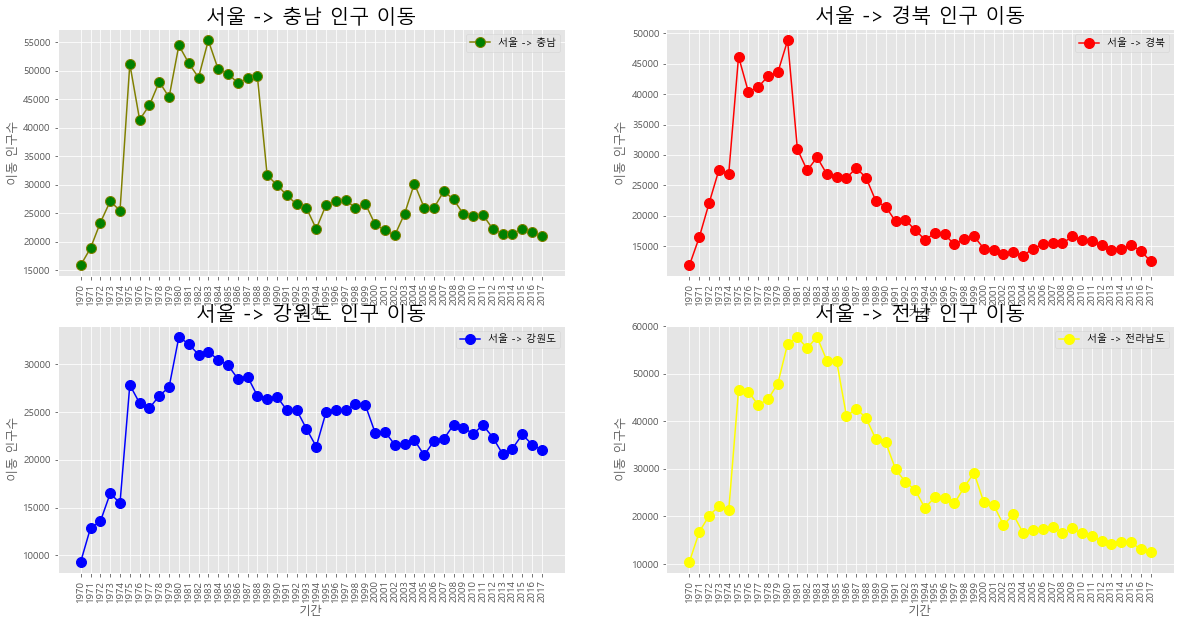

In [66]:
plt.style.use('ggplot')                        # 스타일 사용(면적)

fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(2, 2, 1)             # 이렇게 그래프를 하나 만들고
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# ax에 그래프를 추가
ax1.plot(col_years, df_two.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
       markersize = 10, color = 'olive', label = '서울 -> 충남')

ax2.plot(col_years, df_two.loc['경상북도', :], marker = 'o', markerfacecolor = 'red',
       markersize = 10, color = 'red', label = '서울 -> 경북')

ax3.plot(col_years, df_two.loc['강원도', col_years], marker = 'o', markerfacecolor = 'blue',
       markersize = 10, color = 'blue', label = '서울 -> 강원도')

ax4.plot(col_years, df_two.loc['전라남도', col_years], marker = 'o', markerfacecolor = 'yellow',
       markersize = 10, color = 'yellow', label = '서울 -> 전라남도')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')
ax3.legend(loc = 'best')
ax4.legend(loc = 'best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size = 20)
ax2.set_title('서울 -> 경북 인구 이동', size = 20)
ax3.set_title('서울 -> 강원도 인구 이동', size = 20)
ax4.set_title('서울 -> 전남 인구 이동', size = 20)

# 축 이름 추가
ax1.set_xlabel('기간', size = 12)
ax1.set_ylabel('이동 인구수', size = 12)

ax2.set_xlabel('기간', size = 12)
ax2.set_ylabel('이동 인구수', size = 12)

ax3.set_xlabel('기간', size = 12)
ax3.set_ylabel('이동 인구수', size = 12)

ax4.set_xlabel('기간', size = 12)
ax4.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation = 'vertical')
ax2.set_xticklabels(col_years, rotation = 'vertical')
ax3.set_xticklabels(col_years, rotation = 'vertical')
ax4.set_xticklabels(col_years, rotation = 'vertical')

plt.show()

In [71]:
df_3 = df_two.T      # df_two.transpose()  -> 행과 열의 위치를 바꿈

df_3.index = df_3.index.map(int)   # str -> int 형으로 변경
df_3.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017],
           dtype='int64')

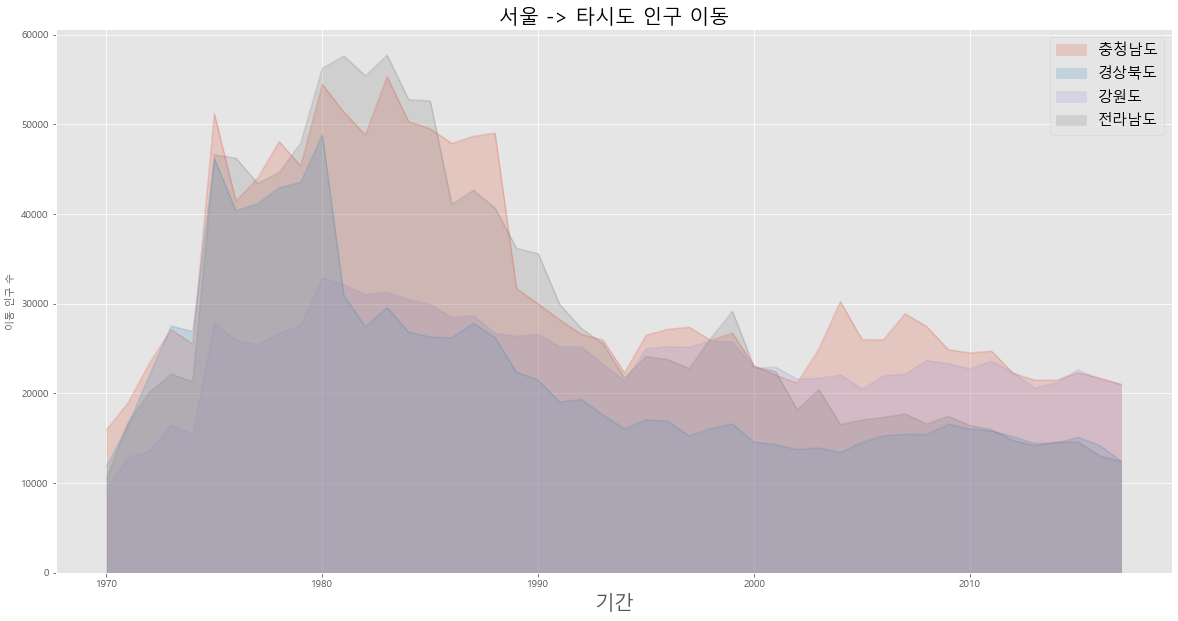

In [74]:
# 면적 그래프

plt.style.use('ggplot')

df_3.plot(kind = 'area', stacked = False, alpha = 0.2, figsize = (20, 10))  # stacked = 쌓는거
                                                                            # alpha = 투명도
plt.title('서울 -> 타시도 인구 이동', size = 20)
plt.ylabel('이동 인구 수', size = 10)
plt.xlabel('기간', size = 20)
plt.legend(fontsize = 15)

plt.show()

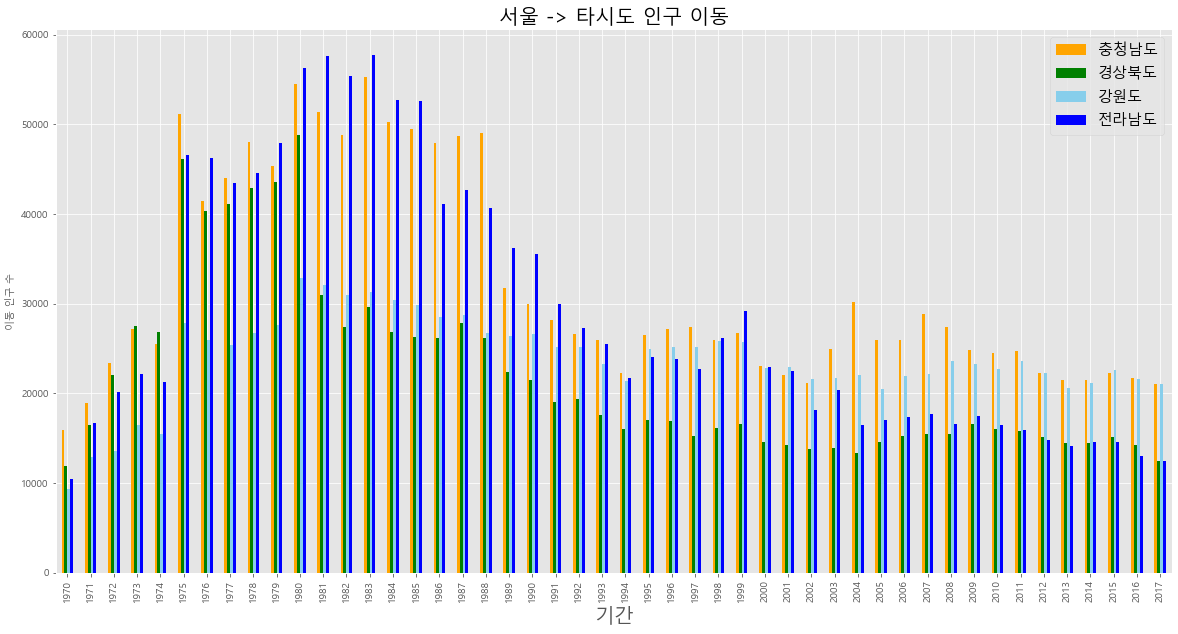

In [76]:
# 막대 그래프

plt.style.use('ggplot')

df_3.plot(kind = 'bar', color = ['orange', 'green', 'skyblue', 'blue'], figsize = (20, 10))  

plt.title('서울 -> 타시도 인구 이동', size = 20)
plt.ylabel('이동 인구 수', size = 10)
plt.xlabel('기간', size = 20)
plt.legend(fontsize = 15)

plt.show()

In [78]:
# 2010년도에서 2017년도까지의 충청남도, 경상남도. 강원도, 전라남도로 이동한 인구 데이터

col_years = list(map(str, range(2010, 2018)))

df_4 = df_seoul.loc[['충청남도', '경상남도', '강원도', '전라남도'], col_years]
df_4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상남도,15689,16039,14474,14447,14799,15220,13717,12692
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [79]:
# 합계 : 이동인구수의 합계
df_4['합계'] = df_4.sum(axis = 1)
df_4

,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533.0
경상남도,15689,16039,14474,14447,14799,15220,13717,12692,117077.0
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731.0
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035.0


In [80]:
# 수평 막대그래프, 도시별 인구 이동수의 합계를 그래프로 표현

df_total = df_4[['합계']].sort_values(by= '합계')
df_total

,합계
전입지,
전라남도,116035.0
경상남도,117077.0
강원도,175731.0
충청남도,179533.0


Text(0.5, 1.0, '서울 -> 타 도시 인구 이동')

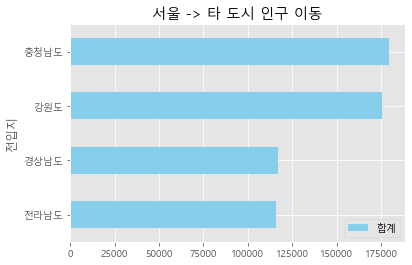

In [84]:
df_total.plot(kind = 'barh', color = 'skyblue', width = 0.5)
plt.title('서울 -> 타 도시 인구 이동')

In [96]:
# 남북한 발전전력량 데이터를 가지고 그래프를 생성 - twinx

df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df.head(10)                        # 총 9개의 row가 존재, 여기서 북한의 자료만 추출

df_north = df.loc[5 :].copy()
print(df_north)                    # 전력량(억kWh) 컬럼 제거

df_north.drop('전력량 (억㎾h)', axis = 1, inplace = True)
df_north

  전력량 (억㎾h) 발전 전력별 1990 1991 1992 1993 1994 1995 1996 1997  ... 2007 2008  \
5        북한     합계  277  263  247  221  231  230  213  193  ...  236  255   
6       NaN     수력  156  150  142  133  138  142  125  107  ...  133  141   
7       NaN     화력  121  113  105   88   93   88   88   86  ...  103  114   
8       NaN    원자력    -    -    -    -    -    -    -    -  ...    -    -   

  2009 2010 2011 2012 2013 2014 2015 2016  
5  235  237  211  215  221  216  190  239  
6  125  134  132  135  139  130  100  128  
7  110  103   79   80   82   86   90  111  
8    -    -    -    -    -    -    -    -  

[4 rows x 29 columns]


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [97]:
df_north.info                                    # 데이터 확인, '발전전력별' 컬럼을 인덱스로 설정
df_north.set_index('발전 전력별', inplace = True)
df_north

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [98]:
df_north = df_north.T

In [99]:
# 증감율 계산, 수력, 화력, 합계 -> 총발전량, 증감율 컬럼을 추가

df_north = df_north.rename(columns = {'합계' : '총발전량'})

df_north['총발전량 - 1년'] = df_north['총발전량'].shift(1)
df_north

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [100]:
# df_north['증감율'] = ((올해의 총발전량 / 이전년도의 총발전량) - 1) * 100
# df_north['총발전량'].shift(1)

df_north['증감율'] = ((df_north['총발전량'] / df_north['총발전량 - 1년']) - 1) * 100
df_north

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.391304
1997,193,107,86,-,213,-9.389671
1998,170,102,68,-,193,-11.917098
1999,186,103,83,-,170,9.411765


<AxesSubplot:>

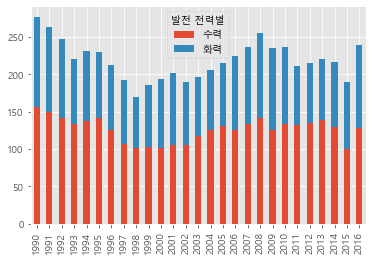

In [101]:
df_north[['수력', '화력']].plot(kind = 'bar', stacked = True)

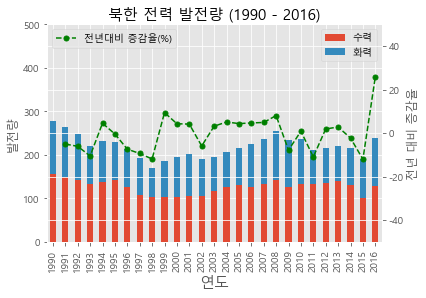

In [110]:
# 2개의 축을 가진 그래프 그리기

ax1 = df_north[['수력', '화력']].plot(kind = 'bar', stacked = True)
ax2 = ax1.twinx()

ax2.plot(df_north.index, df_north['증감율'], linestyle = '--', marker = 'o',
        markersize = 5, color = 'green', label = '전년대비 증감율(%)')           # plot(x축, y축)

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size = 15)
ax1.set_ylabel('발전량')

ax2.set_ylabel('전년 대비 증감율')
plt.title('북한 전력 발전량 (1990 - 2016)', size = 15)

ax2.legend(loc = 'upper left')
ax1.legend(loc = 'best')

plt.show()

In [113]:
# seaborn 을 활용한 고급 그래프 작성하기

import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head()); print(0)

print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

<AxesSubplot:xlabel='age', ylabel='fare'>

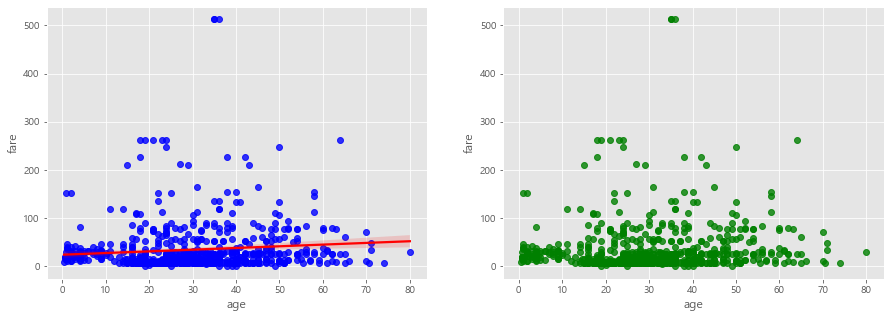

In [120]:
# age, fare 컬럼간의 관계 -> 회귀선(fit_reg)

fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)      # 회귀선을 그리기
ax2 = fig.add_subplot(1, 2, 2)      # 회귀선 보이지 않기

# 그래프 그리기 - 선형회귀선 표시 (fit_reg = True)
sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax1, color = 'blue', 
            line_kws = {'color' : 'red'})

# 그래프 그리기 - 선형회귀선 표시 (fit_reg = False)
sns.regplot(x = 'age', y = 'fare', data = titanic, ax = ax2, fit_reg = False, color = 'green')

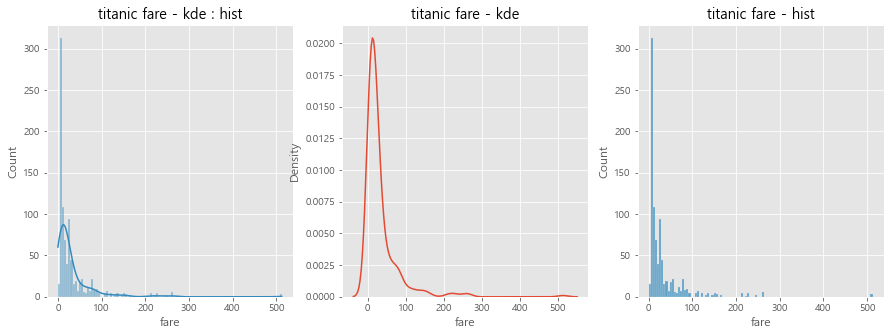

In [131]:
# 커널 밀도 함수 : 데이터가 집중된 분포 - hist, kde (막대, 커널밀도)

fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값 : hist, kde
sns.histplot(titanic['fare'], ax =ax1, kde =True)
ax1.set_title('titanic fare - kde : hist')

# hist : False
# sns.distplot(titanic['fare'], ax =ax2, hist = False)
sns.kdeplot(titanic['fare'], ax =ax2)
ax2.set_title('titanic fare - kde')

# kde : False
# sns.distplot(titanic['fare'], ax =ax3, hist = False)
sns.histplot(titanic['fare'], ax =ax3)
ax3.set_title('titanic fare - hist')

plt.show()

<AxesSubplot:xlabel='class', ylabel='sex'>

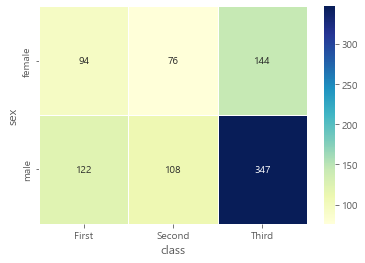

In [140]:
# heatmap : 색갈로 다수의 변수에 관계성을 보여주는 그래프
                               # aggfunc 는 분포도 (여기서는 사이즈가 분포의 정도를 나타낸다?)
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')
sns.heatmap(table, annot = True, fmt = 'd', cmap = 'YlGnBu', linewidth = .5, cbar = True)

In [138]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

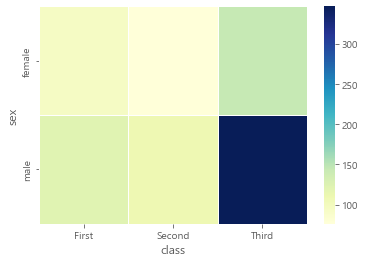

In [141]:
sns.heatmap(table, annot = False, fmt = 'd', cmap = 'YlGnBu', linewidth = .5, cbar = True)
         # annot 은 수치 표현    # fmt 는 주석을 추가할 때 문자열 형식코드

In [ ]:
df.plot(x, y) # x와 y의 개수는 동일해야한다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


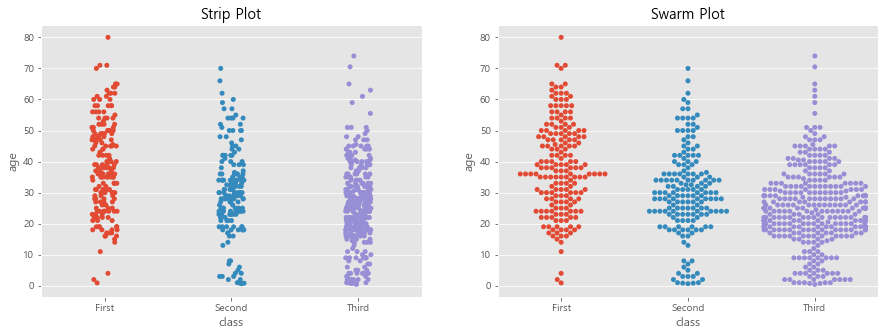

In [145]:
# 범주형 데이터의 산점도

titanic['class'].dtype            # categories 는 범주형 데이터

fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 : 데이터 분산을 고려하지 않음
sns.stripplot(x = 'class', y = 'age' , data =titanic, ax = ax1)

# 이산형 변수의 분포 : 데이터 분산을 고려
sns.swarmplot(x = 'class', y = 'age' , data =titanic, ax = ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

In [ ]:
# 그래프 중에서 join? 사용하는 거 스스로 해보기

In [146]:
!pip install folium     # !는 cmd창에서 명령어를 실행한 결과와 동일

In [147]:
# 지도를 활용 : Folium 라이브러리

import folium

In [150]:
# 서울의 지도 만들기

seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12)    # zoom = 12 : 12번 줌

seoul_map

# 파일로 저장
seoul_map.save('./dataset/seoul.html')

In [152]:
# 지도 스타일 적용하기

seoul_map2 = folium.Map(location = [37.55, 126.98], zoom_start = 12, tiles = 'Stamen Terrain')
seoul_map3 = folium.Map(location = [37.55, 126.98], zoom_start = 12, tiles = 'Stamen Toner')

# 지도 저장하기
seoul_map2.save('./dataset/seoul2.html')
seoul_map3.save('./dataset/seoul3.html')

In [ ]:
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx')
df

In [155]:
# 지도에 마커 표시하기
# 위도, 경도의 자료가 있는 데이터를 로드
                                                              # 0열을 인덱스로 바로 만들기
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx', index_col = 0)
print(df.head())

seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12, tiles = 'Stamen Terrain')

df.head()

                     위도          경도
KAIST 서울캠퍼스   37.592573  127.046737
KC대학교         37.548345  126.854797
가톨릭대학교(성신교정)  37.585922  127.004328
가톨릭대학교(성의교정)  37.499623  127.006065
감리교신학대학교      37.567645  126.961610


,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [158]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
#     print(name, lat, lng)       # popup을 사용하여 마커를 눌렀을 때 이름이 나오게 만듦
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)
seoul_map.save('./dataset/seoul_colleage.html')

In [ ]:
# Figure : 그림(그래프)이 그려지는 하나의 캔버스나 종이
# Axes : 하나의 플롯(그림, 그래프)
# Axis : 세로나 가로

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx')

print(df.head())             # NaN 값이 있음(전국 아래), 이전 자료의 값으로 대체

df_1 = df.fillna(method = 'ffill')      # NaN 값이 나오면 이전의 값으로 채워라
df_1.head()

   전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      201

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
# 전출지별이 '서울특별시'인 자료만 검색

mask = ((df_1['전출지별'] == '서울특별시') & (df_1['전입지별'] != '서울특별시'))
mask

0      False
1      False
2      False
3      False
4      False
       ...  
320    False
321    False
322    False
323    False
324    False
Length: 325, dtype: bool

In [7]:
df_seoul = df_1[mask].copy()
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [8]:
# 전출지별 컬럼 삭제

df_seoul.drop(columns = '전출지별', axis = 1, inplace = True)

# 전입지별 -> 전입지로 변경

df_seoul.rename(columns = {'전입지별' : '전입지'}, inplace = True)

df_seoul.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [9]:
# 전입지 컬럼을 인덱스로 설정

df_seoul.set_index('전입지', inplace = True)
df_seoul.head()

# NaN 데이터를 처리 -> fillna(method = 'ffill') : '전출지별' 데이터의 NaN을 이전 자료로 대체
# 전출지별이 서울특별시인 자료만 추출
# 전출지별 컬럼을 삭제
# 전입지별 컬럼명을 전입지로 수정
# 전입지 컬럼을 인덱스로 설정

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [10]:
# 경기도로 전입한 인구수의 변화도를 그래프로 표현

sr_one = df_seoul.loc['경기도'].copy()
sr_one
# plt.plot(sr_one.index, sr_one.values)  # x축은 연도, y축은 인구수

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

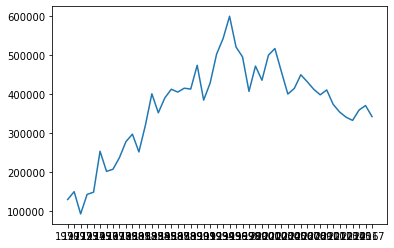

In [11]:
plt.plot(sr_one.index, sr_one.values)  # x축은 연도, y축은 인구수

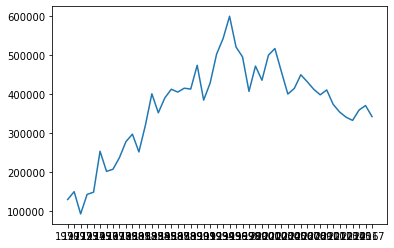

In [12]:
plt.plot(sr_one)                      # 이렇게 사용해도 위와 동일(이 경우는 왼쪽이 x축)